# S&P 500 P/E Analysis - First Look

### Credit:
    Data for this exercise is based on the S&P 500 companies fundamental data provided by Dominik Gawlik at
    https://www.kaggle.com/dgawlik/nyse

## Learning Objectives

Take an initial look at a data set:
    * open csv files
    * conduct indexing and boolean slicing
    * show summary data views
    * basic plotting

## Imports

Import the pandas package. Pandas is a work horse of the Python analytic community.

In [1]:
import pandas as pd

Initialize inline plotting with the iPython magic command shown below.

In [2]:
%matplotlib inline

## Get Data

In [3]:
df = pd.read_csv('relative_valuation.csv')

## Look at Top 5 Rows

Notes :
    * Target "p/e" is a positive continuous variable.
    * Several parameters capturing the income characteristics and financial health of a firm.

In [4]:
df.head()

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
0,AAP,6.75,39,25,3.0,22.0,45,9,8,0.205506,0.816966,7.202367,5.016578,8.683605,23.180741,0.000111,7.070079,12.501648
1,ADM,3.44,16,11,42.0,107.0,6,3,4,0.125645,0.282401,6.110762,2.897748,4.269652,15.122093,3.276835,0.000000,0.000000
2,ADS,8.72,35,21,25.0,219.0,31,21,16,0.401414,3.394390,25.347430,9.547402,20.714302,32.725917,0.060110,14.338562,19.075643
3,AEE,2.42,14,9,0.0,52.0,41,21,16,0.273005,0.906450,25.623658,9.780274,21.658682,19.004133,0.015196,25.200772,1.843959
4,AFL,6.54,24,16,NaN,NaN,37,20,20,0.062413,0.407424,28.819078,12.983985,21.154523,9.339450,0.180058,1.428607,0.000000


## View Data Types

In [5]:
df.dtypes

TickerSymbol                   object
EarningsPerShare              float64
Pre-TaxROE                      int64
AfterTaxROE                     int64
CashRatio                     float64
QuickRatio                    float64
GrossMargin                     int64
OperatingMargin                 int64
Pre-TaxMargin                   int64
debt_to_asset                 float64
debt_to_equity                float64
operating_cash_flow_margin    float64
profit_margin                 float64
ebit_margin                   float64
p/e                           float64
p/s                           float64
capital_surplus_to_asset      float64
Goodwill_to_asset             float64
dtype: object

## Slicing Basics

There are three major slicing methods, ([ ... ], .loc[ ... ], .iloc[ ... ]). 

#### The [ ... ] operator

Below we demonstrate the implicit nature of the [ ... ] operator and its sometimes unintuitive behavior. It is best to use the [ ... ] operator for cases (1) and (3). Case (2) is best conducted with iloc[ ... ].

(1) Using the [ ... ] operators will allow pandas to infer what is being requested. Passing a column name or list of column names to this operator will return a Series or DataFrame containing the column or columns requested.

In [6]:
# returns a Series
df['OperatingMargin']

0       9
1       3
2      21
3      21
4      20
5      16
6       7
7      11
8      12
9      17
10     22
11      4
12     13
13     19
14      4
15      8
16     12
17      0
18      3
19     12
20     12
21     10
22      2
23      6
24      9
25     11
26      0
27     19
28     15
29      9
       ..
149     3
150    18
151    15
152     6
153    22
154    15
155    10
156     4
157    18
158     8
159     8
160     5
161    14
162    19
163    12
164     5
165    18
166    12
167    22
168     0
169     7
170     6
171    16
172    21
173     6
174    17
175     4
176     9
177     6
178    12
Name: OperatingMargin, dtype: int64

In [7]:
# returns a DataFrame
df[['OperatingMargin', 'operating_cash_flow_margin']]

,OperatingMargin,operating_cash_flow_margin
0,9,7.202367
1,3,6.110762
2,21,25.347430
3,21,25.623658
4,20,28.819078
5,16,7.774120
6,7,3.793384
7,11,20.143093
8,12,9.183007
9,17,19.841270


(2) Handing in a list of ints returns the columns at those locations. Notice the use of 0 based indexing.

In [8]:
# returns the first four columns
df[[1,2,3,4]]

,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio
0,6.75,39,25,3.0
1,3.44,16,11,42.0
2,8.72,35,21,25.0
3,2.42,14,9,0.0
4,6.54,24,16,NaN
5,5.27,10,7,NaN
6,6.52,14,9,NaN
7,1.69,16,10,218.0
8,6.37,19,13,NaN
9,0.88,18,14,112.0


(3) Below we create a Series of True and False values. Then we pass the Series to df[ ... ] and slice rows instead of columns.

In [9]:
# returns the first 5 rows
boolean_series = df.index < 5 
df[boolean_series]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
0,AAP,6.75,39,25,3.0,22.0,45,9,8,0.205506,0.816966,7.202367,5.016578,8.683605,23.180741,0.000111,7.070079,12.501648
1,ADM,3.44,16,11,42.0,107.0,6,3,4,0.125645,0.282401,6.110762,2.897748,4.269652,15.122093,3.276835,0.000000,0.000000
2,ADS,8.72,35,21,25.0,219.0,31,21,16,0.401414,3.394390,25.347430,9.547402,20.714302,32.725917,0.060110,14.338562,19.075643
3,AEE,2.42,14,9,0.0,52.0,41,21,16,0.273005,0.906450,25.623658,9.780274,21.658682,19.004133,0.015196,25.200772,1.843959
4,AFL,6.54,24,16,NaN,NaN,37,20,20,0.062413,0.407424,28.819078,12.983985,21.154523,9.339450,0.180058,1.428607,0.000000


#### The .loc[ ... ] operator

The .loc[ ... ] operator provides row, columns access simultaniously using the syntax df.loc[some_row_indexer, some_column_indexer]. The .loc[ ... ] method also provides access to the members of a DataFrame for the puposes of overwriting data.

In [10]:
# first 3 rows and all columns, notice the :2 and : syntax used to slice.
# also noe the 0 indexing and inclusive range (index 2 is included)
df.loc[:2, :]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
0,AAP,6.75,39,25,3.0,22.0,45,9,8,0.205506,0.816966,7.202367,5.016578,8.683605,23.180741,0.000111,7.070079,12.501648
1,ADM,3.44,16,11,42.0,107.0,6,3,4,0.125645,0.282401,6.110762,2.897748,4.269652,15.122093,3.276835,0.000000,0.000000
2,ADS,8.72,35,21,25.0,219.0,31,21,16,0.401414,3.394390,25.347430,9.547402,20.714302,32.725917,0.060110,14.338562,19.075643


#### The .iloc[ ... ] operator

The .iloc[ ... ] operator works like .loc[ ... ], but where as .loc[ ... ] references indexes and columns by name, .iloc[ ... ] references by position.

In [11]:
# sort df on the batting_average column
sortvals = df.sort_values('operating_cash_flow_margin')

In [12]:
# notice the index names sort with the rows
sortvals.head()

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
145,STI,3.26,10,8,NaN,NaN,0,0,26,0.006447,0.053336,-13.575284,20.374411,29.711726,12.800613,2.635983,4.775440,3.329515
97,LEN,3.12,20,13,NaN,NaN,19,12,12,0.360691,0.965661,-10.135052,8.212486,12.935210,14.830128,0.123243,17.329938,0.000000
101,LUK,0.54,4,2,87.0,131.0,25,4,4,0.162054,0.827781,-9.241430,2.422042,12.608416,41.907406,0.778560,9.614466,0.000000
47,DHI,1.57,16,10,NaN,NaN,22,12,10,0.359897,0.716545,-8.241847,6.648058,10.145921,12.942675,0.009369,25.661241,0.930744
146,STT,4.65,11,9,NaN,NaN,0,0,23,0.000000,0.000000,-5.259704,20.204388,26.523533,16.849462,3.702269,3.571806,2.125354


In [13]:
# using .loc returns all of the rows until index 147 is reached
sortvals.loc[:147, :]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
145,STI,3.26,10,8,NaN,NaN,0,0,26,0.006447,0.053336,-13.575284,20.374411,29.711726,12.800613,2.635983,4.775440,3.329515
97,LEN,3.12,20,13,NaN,NaN,19,12,12,0.360691,0.965661,-10.135052,8.212486,12.935210,14.830128,0.123243,17.329938,0.000000
101,LUK,0.54,4,2,87.0,131.0,25,4,4,0.162054,0.827781,-9.241430,2.422042,12.608416,41.907406,0.778560,9.614466,0.000000
47,DHI,1.57,16,10,NaN,NaN,22,12,10,0.359897,0.716545,-8.241847,6.648058,10.145921,12.942675,0.009369,25.661241,0.930744
146,STT,4.65,11,9,NaN,NaN,0,0,23,0.000000,0.000000,-5.259704,20.204388,26.523533,16.849462,3.702269,3.571806,2.125354
94,KMX,2.20,24,15,101.0,114.0,13,7,6,0.627004,2.212975,-4.876320,3.917403,6.586101,21.877273,0.424268,8.868156,0.000000
139,SEE,1.22,23,13,17.0,112.0,35,8,3,0.538400,3.682491,-2.823044,2.855300,7.159538,35.000001,0.123960,22.468943,37.681688
118,NFLX,4.44,19,14,60.0,147.0,32,7,6,0.125786,0.476851,0.299437,4.846788,7.259091,11.227156,9.443929,0.000000,0.000000
134,PSX,8.40,27,22,47.0,120.0,13,2,4,0.160047,0.360954,2.189043,3.046920,3.729251,8.605952,0.002690,39.102933,6.723897
104,MCK,5.51,25,15,14.0,67.0,6,2,2,0.172511,1.047759,2.282520,0.968761,1.798504,31.949182,0.005125,12.658668,19.179273


In [14]:
# returns the first 10 rows with no consideration of the index names
sortvals.iloc[:10, :]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
145,STI,3.26,10,8,NaN,NaN,0,0,26,0.006447,0.053336,-13.575284,20.374411,29.711726,12.800613,2.635983,4.775440,3.329515
97,LEN,3.12,20,13,NaN,NaN,19,12,12,0.360691,0.965661,-10.135052,8.212486,12.935210,14.830128,0.123243,17.329938,0.000000
101,LUK,0.54,4,2,87.0,131.0,25,4,4,0.162054,0.827781,-9.241430,2.422042,12.608416,41.907406,0.778560,9.614466,0.000000
47,DHI,1.57,16,10,NaN,NaN,22,12,10,0.359897,0.716545,-8.241847,6.648058,10.145921,12.942675,0.009369,25.661241,0.930744
146,STT,4.65,11,9,NaN,NaN,0,0,23,0.000000,0.000000,-5.259704,20.204388,26.523533,16.849462,3.702269,3.571806,2.125354
94,KMX,2.20,24,15,101.0,114.0,13,7,6,0.627004,2.212975,-4.876320,3.917403,6.586101,21.877273,0.424268,8.868156,0.000000
139,SEE,1.22,23,13,17.0,112.0,35,8,3,0.538400,3.682491,-2.823044,2.855300,7.159538,35.000001,0.123960,22.468943,37.681688
118,NFLX,4.44,19,14,60.0,147.0,32,7,6,0.125786,0.476851,0.299437,4.846788,7.259091,11.227156,9.443929,0.000000,0.000000
134,PSX,8.40,27,22,47.0,120.0,13,2,4,0.160047,0.360954,2.189043,3.046920,3.729251,8.605952,0.002690,39.102933,6.723897
104,MCK,5.51,25,15,14.0,67.0,6,2,2,0.172511,1.047759,2.282520,0.968761,1.798504,31.949182,0.005125,12.658668,19.179273


## Use Boolean Indexing to Count the Number of NaNs

Using .isnull() and .any(axis=1) methods chained to a DataFrame will return a series indicating which rows have NULLs

In [15]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29      True
       ...  
149    False
150    False
151    False
152    False
153     True
154    False
155    False
156    False
157    False
158    False
159     True
160     True
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168     True
169    False
170    False
171    False
172    False
173    False
174    False
175     True
176    False
177    False
178    False
dtype: bool

Get a count of nulls using the fact that summing booleans treats True as 1 and False as 0

In [16]:
df.isnull().any(axis=1).sum()

33

Store the boolean series to a variable

In [17]:
bix = df.isnull().any(axis=1)

Subset the dataframe by handing in the boolean series to view the rows with NaNs. Any row where the series is True is kept.

In [18]:
df[bix]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
4,AFL,6.54,24,16,NaN,NaN,37,20,20,0.062413,0.407424,28.819078,12.983985,21.154523,9.339450,0.180058,1.428607,0.000000
5,AIG,5.27,10,7,NaN,NaN,48,16,16,0.060547,0.292026,7.774120,11.689905,18.971835,10.647059,4.152102,15.702285,0.000000
6,AIZ,6.52,14,9,NaN,NaN,22,7,7,0.044462,0.270845,3.793384,4.535954,7.730291,10.394171,0.009727,9.920879,2.665315
8,ALL,6.37,19,13,NaN,NaN,40,12,12,0.047382,0.230452,9.183007,8.138710,12.934533,11.007850,0.017909,2.948958,1.123720
17,BBT,2.79,13,9,NaN,NaN,0,0,31,0.000000,0.000000,32.106421,21.774355,36.567313,13.853047,13.928381,3.488123,3.676526
26,CFG,1.55,7,4,NaN,NaN,0,0,24,0.004606,0.031763,26.020217,16.192437,27.536503,15.974194,0.027810,14.057219,5.175489
29,CI,7.97,31,20,NaN,NaN,39,9,9,0.091749,0.475775,5.711176,6.020508,9.463253,12.902133,0.217948,4.956148,10.719527
30,CINF,3.21,11,8,NaN,NaN,16,15,15,0.046458,0.132512,17.654196,10.616785,15.652174,16.077882,4.143412,6.475357,0.000000
34,CNC,2.30,26,16,NaN,NaN,23,3,3,0.191449,0.639335,7.385266,1.636473,2.971014,22.704348,0.000000,14.423077,12.946429
36,COF,7.71,15,10,NaN,NaN,0,0,28,0.000000,0.000000,38.979429,18.551259,29.578114,10.699092,0.020736,9.043473,4.535852


## Use Boolean Indexing to Remove NaN Rows

Now we use the .notnull() method to find the non NULL rows and store a boolean series.

In [19]:
bix = df.notnull().all(axis=1)

This returns the dataframe without the null rows

In [20]:
df[bix]

,TickerSymbol,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
0,AAP,6.75,39,25,3.0,22.0,45,9,8,0.205506,0.816966,7.202367,5.016578,8.683605,23.180741,0.000111,7.070079,12.501648
1,ADM,3.44,16,11,42.0,107.0,6,3,4,0.125645,0.282401,6.110762,2.897748,4.269652,15.122093,3.276835,0.000000,0.000000
2,ADS,8.72,35,21,25.0,219.0,31,21,16,0.401414,3.394390,25.347430,9.547402,20.714302,32.725917,0.060110,14.338562,19.075643
3,AEE,2.42,14,9,0.0,52.0,41,21,16,0.273005,0.906450,25.623658,9.780274,21.658682,19.004133,0.015196,25.200772,1.843959
7,ALB,1.69,16,10,218.0,262.0,32,11,9,0.425616,1.635228,20.143093,7.745544,10.408178,35.686391,0.019236,0.200015,4.657423
9,AMAT,0.88,18,14,112.0,191.0,42,17,16,0.147791,0.247458,19.841270,11.816578,17.008377,23.909092,0.027831,48.459086,25.079702
10,AME,2.39,25,18,40.0,116.0,35,22,20,0.222369,0.440746,18.049938,14.531706,21.998208,22.016736,0.033872,7.658509,40.710872
11,AN,3.57,33,20,2.0,28.0,16,4,4,0.250414,1.015105,2.538621,2.191137,4.303253,16.817927,0.005027,0.735741,15.651749
12,APD,4.66,19,13,11.0,87.0,27,13,13,0.271358,0.654987,20.979979,12.592202,14.278188,25.107891,2.795334,4.735898,6.959295
13,APH,2.26,33,24,127.0,247.0,32,19,18,0.379994,0.913049,16.479282,13.529137,19.696941,23.734513,0.003010,9.439013,37.456877


Store the new dataframe to a name.

In [21]:
subset = df[bix]

## Look at Summary Stats

Note:
    * these variables are on very different scales
    * all variables are positive
    * consider the individual variables distributions
        - Salary for instance is heavily skewed
        - This can be seen by comparing the mean and median

In [22]:
subset.describe()

,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.458767,22.294521,15.424658,47.726027,123.602740,30.479452,12.082192,11.109589,0.227528,0.750862,13.691306,8.313016,12.753143,21.888464,1.400077,16.900353,17.737734
std,2.378205,10.204913,6.803484,55.610780,81.785209,10.876244,6.039533,6.568602,0.125635,0.704992,8.638832,4.787935,7.364707,12.497488,3.174792,17.061349,16.369561
min,-2.580000,1.000000,2.000000,0.000000,10.000000,6.000000,0.000000,1.000000,0.000000,0.000000,-9.241430,-2.252885,1.409390,-28.779070,0.000000,0.000000,0.000000
25%,1.860000,15.000000,10.250000,11.250000,71.000000,23.000000,8.000000,6.250000,0.144506,0.297018,7.498277,4.645786,7.306614,15.544375,0.015095,4.341478,1.372582
50%,2.970000,22.500000,15.000000,31.000000,104.500000,32.000000,12.000000,11.000000,0.228223,0.604959,12.497273,7.820948,12.338856,19.937240,0.051733,11.979672,14.443672
75%,4.415000,30.000000,20.750000,60.000000,154.750000,39.000000,16.750000,15.000000,0.309276,0.934102,18.348204,11.074523,16.729717,24.846098,1.104627,25.109497,30.055251
max,14.350000,45.000000,29.000000,309.000000,619.000000,49.000000,28.000000,47.000000,0.627004,4.876463,48.471436,27.681027,56.710750,81.619043,18.767629,91.464171,61.195090


## Review Pairwise Correlations

Look for correlations with the target. For those things which are highly correlated with the target look at other highly correlated variables. Be aware of these relationships they can cause problems with the regression model.

In [23]:
pd.set_option('display.max_columns', 300)

In [24]:

subset.corr()

,EarningsPerShare,Pre-TaxROE,AfterTaxROE,CashRatio,QuickRatio,GrossMargin,OperatingMargin,Pre-TaxMargin,debt_to_asset,debt_to_equity,operating_cash_flow_margin,profit_margin,ebit_margin,p/e,p/s,capital_surplus_to_asset,Goodwill_to_asset
EarningsPerShare,1.000000,0.389707,0.392657,0.063388,0.008866,-0.053281,0.106889,0.157890,-0.284271,-0.183811,-0.019812,0.111165,0.082963,-0.161082,0.088014,-0.128403,-0.161608
Pre-TaxROE,0.389707,1.000000,0.913436,-0.019507,-0.101265,0.069492,0.131308,0.240059,-0.084080,-0.015801,-0.191099,0.062463,0.124356,-0.212522,0.009183,-0.356994,-0.045474
AfterTaxROE,0.392657,0.913436,1.000000,0.021217,-0.046806,0.147750,0.190651,0.266391,-0.068827,-0.024717,-0.084211,0.218530,0.148107,-0.303923,0.043369,-0.323611,-0.016834
CashRatio,0.063388,-0.019507,0.021217,1.000000,0.805900,0.074984,0.157931,0.279468,-0.249226,-0.159525,0.212954,0.320497,0.181170,-0.008526,-0.125938,0.182035,-0.152483
QuickRatio,0.008866,-0.101265,-0.046806,0.805900,1.000000,0.011086,0.159613,0.254818,-0.134457,0.047537,0.166490,0.275578,0.163572,-0.010287,-0.080811,0.150091,-0.010711
GrossMargin,-0.053281,0.069492,0.147750,0.074984,0.011086,1.000000,0.672910,0.562052,0.066107,-0.042684,0.484637,0.577261,0.583354,0.120447,0.081398,0.145896,0.221855
OperatingMargin,0.106889,0.131308,0.190651,0.157931,0.159613,0.672910,1.000000,0.858031,0.093215,-0.039269,0.733998,0.802629,0.877196,-0.054946,0.114738,0.089244,0.155550
Pre-TaxMargin,0.157890,0.240059,0.266391,0.279468,0.254818,0.562052,0.858031,1.000000,-0.055499,-0.104517,0.698535,0.894932,0.961955,-0.153926,0.140263,0.065158,0.026344
debt_to_asset,-0.284271,-0.084080,-0.068827,-0.249226,-0.134457,0.066107,0.093215,-0.055499,1.000000,0.827114,0.132999,-0.063601,0.078660,0.057318,-0.022053,-0.036960,0.198533
debt_to_equity,-0.183811,-0.015801,-0.024717,-0.159525,0.047537,-0.042684,-0.039269,-0.104517,0.827114,1.000000,0.046145,-0.136281,0.019581,0.075931,-0.022408,-0.086661,-0.001078


## Review Histogram of the Target

Above we set the "%matplotlib inline" option, it allows us to view plots in the notebook.

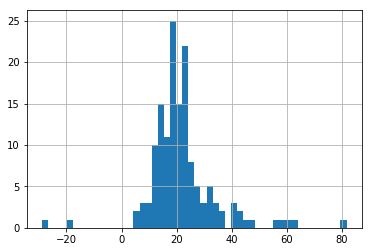

In [25]:
subset['p/e'].hist(bins=50)

## Review KDE of operating_cash_flow_margin

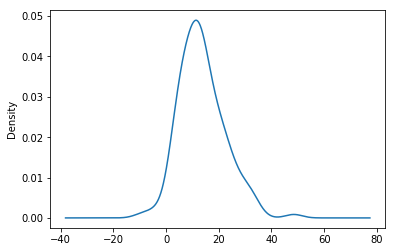

In [26]:
subset['operating_cash_flow_margin'].plot(kind='kde')

## Scatter Plots

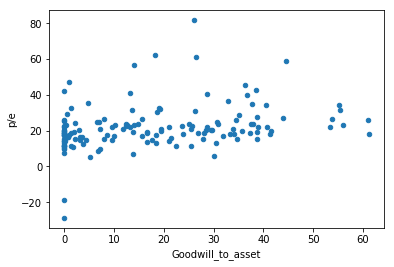

In [27]:
subset.plot(y='p/e', x='Goodwill_to_asset', kind='scatter')

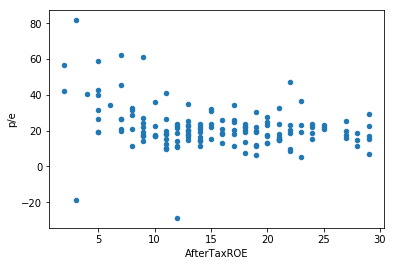

In [28]:
subset.plot(y='p/e', x='AfterTaxROE', kind='scatter')

## Scatter Matrix

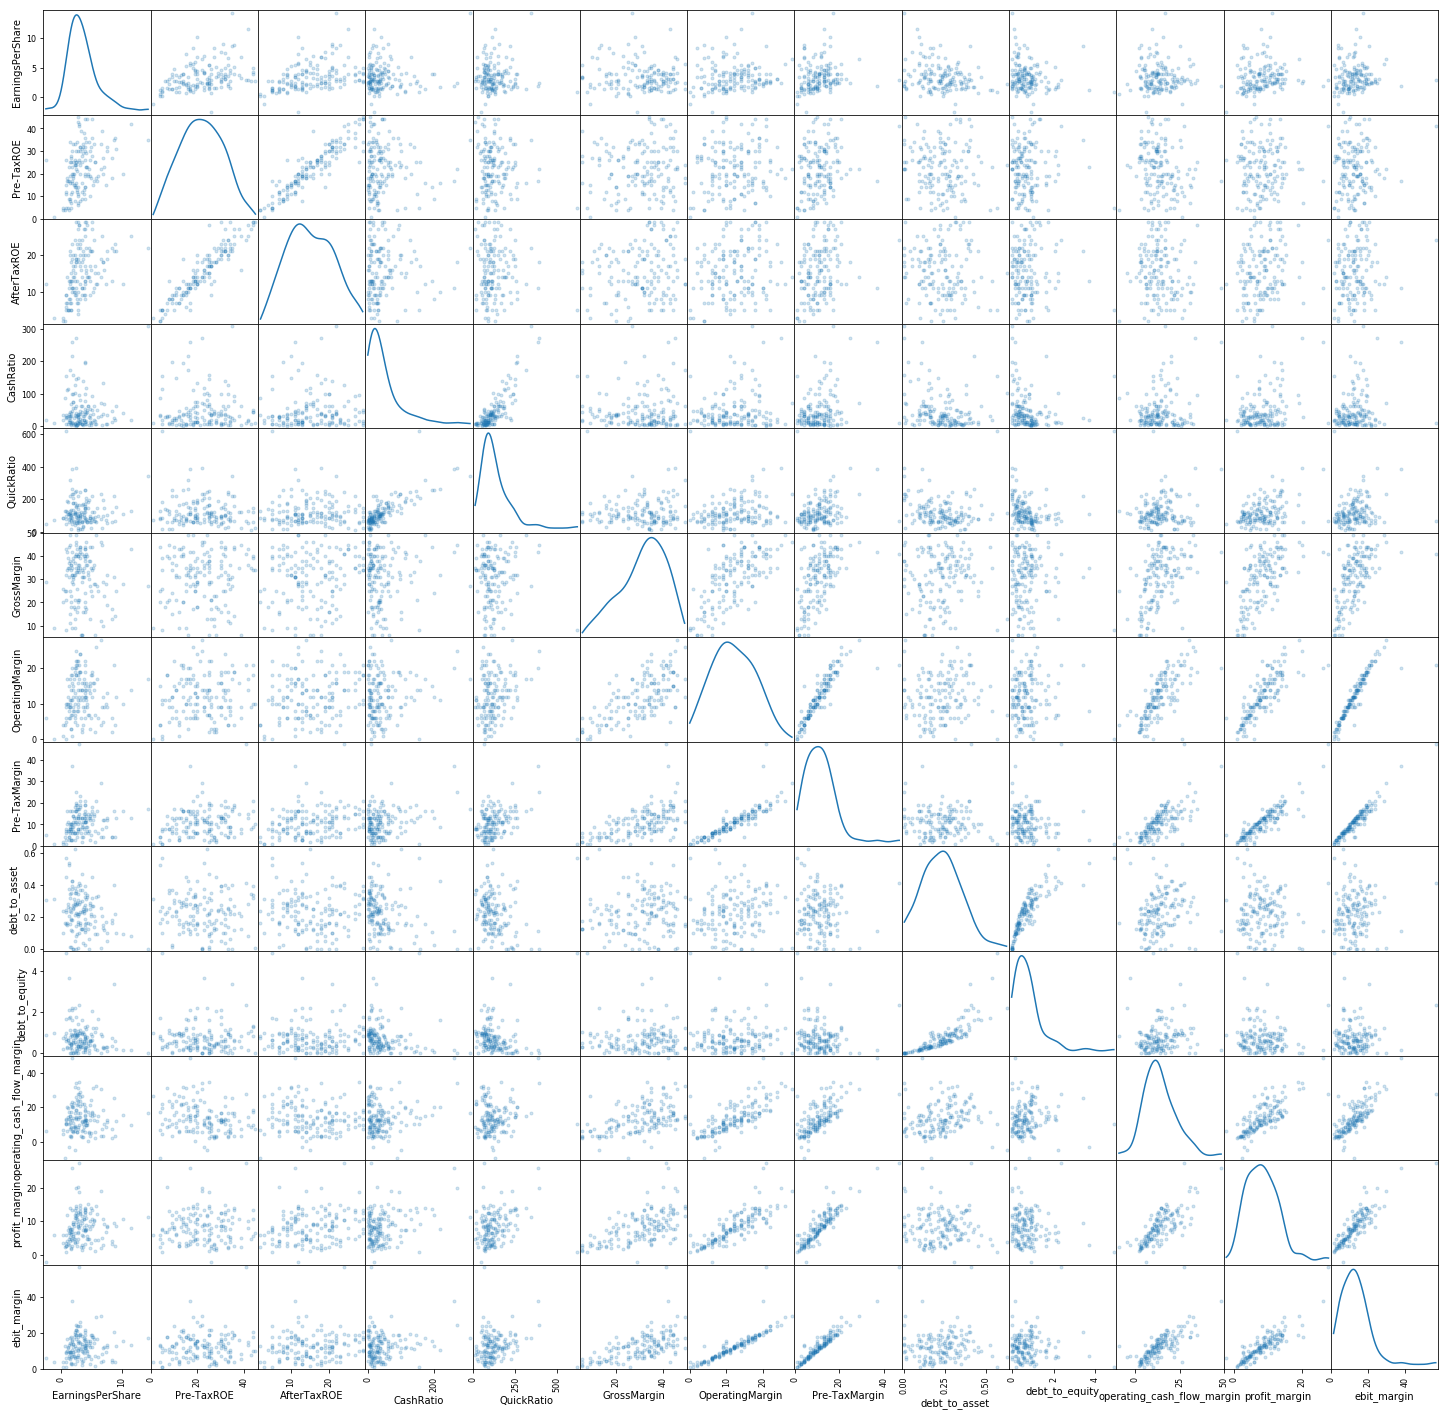

In [29]:
pd.scatter_matrix(subset.iloc[:,:-4], alpha=0.2, figsize=(25, 25), diagonal='kde');